In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as sc
import matplotlib.image as mpimg
from pymatgen.electronic_structure.core import Spin
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import *
with MPRester ("j1twApjMu9mGh9tITSd6") as m:
    bs = m.get_bandstructure_by_material_id("mp-961649") #BandStructure object

In [7]:
#On détermine la bande interdite
gap = bs.get_band_gap()
if gap['direct'] == False : 
    print ("Bande interdite indirecte d'energie: "+str(gap['energy'])+ " eV" + "\n" + "Transition de la bande interdite: " + str(gap['transition']))
else :
    print ("Bande interdite directe d'energie: "+str(gap['energy'])+ " eV" + "\n" + 'Type de transition de bande : ' + str(gap['transition']))
print('Energie de Fermi : ', bs.efermi)

Bande interdite indirecte d'energie: 1.1292999999999997 eV
Transition de la bande interdite: L-(0.190,0.000,0.190)
Energie de Fermi :  7.22288699


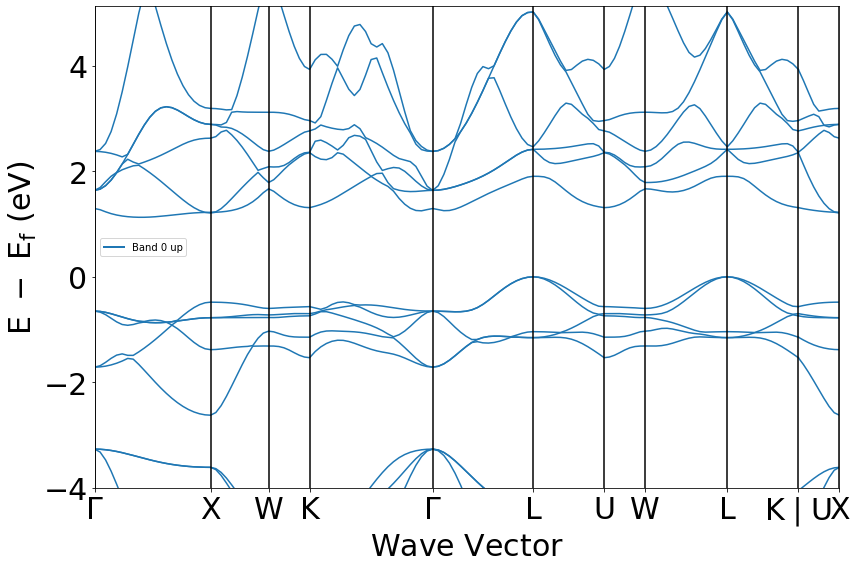

In [9]:
#Figure de bande
plot = BSPlotter(bs)

#Données sur la structure de bande
data = plot.bs_plot_data()
ticks = data.get('ticks')
energy = data.get('energy')
branche = ticks.get('distance')

#Montrer la structure de bande
plot.show()

In [10]:
#On détermine la dernière bande de valence et la première bande de conduction

print("Bande(s) de valence de plus haute énergie: ", bs.get_vbm()['band_index'],'\n')
print("Bande(s) de conduction de plus basse énergie: ", bs.get_cbm()['band_index'],'\n')

Bande(s) de valence de plus haute énergie:  defaultdict(<class 'list'>, {<Spin.up: 1>: [14, 15]}) 

Bande(s) de conduction de plus basse énergie:  defaultdict(<class 'list'>, {<Spin.up: 1>: [16]}) 



Ce sont les bandes de valence 14 et 15 qui possèdent la plus haute énergie et la bande de conduction 16 qui possède la plus basse énergie. Sur le graphe

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

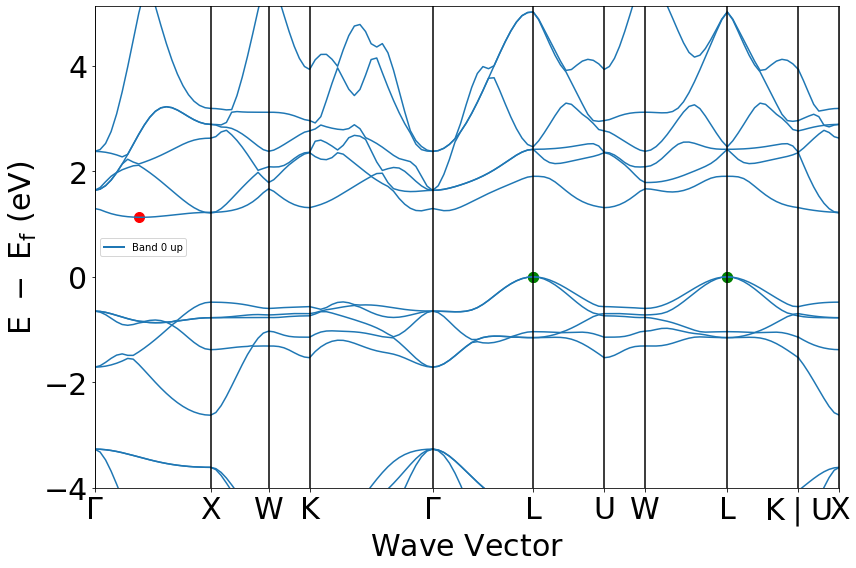

In [12]:
plot.get_plot(vbm_cbm_marker=True)

In [20]:
data = plot.bs_plot_data()

distances = data['distances']
energies = data['energy']

dispersionsVal_14 = [] 
dispersionsVal_15 = [] 
dispersionsCond_16 = []

for i in range(len(distances)):
    dispersionsVal_14.append(abs((energies['1'][i][14][0] - energies['1'][i][14][-1])/(distances[i][-1]-distances[i][0])))
    dispersionsVal_15.append(abs((energies['1'][i][15][0] - energies['1'][i][15][-1])/(distances[i][-1]-distances[i][0])))
    dispersionsCond_16.append(abs((energies['1'][i][16][0] - energies['1'][i][16][-1])/(distances[i][-1]-distances[i][0])))
    
max_14 = np.max(dispersionsVal_14)
max_15 = np.max(dispersionsVal_15)
max_16= np.max(dispersionsCond_16)

min_14 = np.min(dispersionsVal_14)
min_15 = np.min(dispersionsVal_15)
min_16 = np.min(dispersionsCond_16)
if min_14 > min_15:
    minv = min_15
    indexmin = 15
else :
    minv = min_14
    indexmin = 14
print(indexmin)
if max_14 > max_15:
    maxv = max_14
    indexmax = 14
else :
    maxv = max_15
    indexmax = 15
print(indexmax)

print("Pour la bande de valence, la plus grande dispersion se trouve sur le chemin " +str(maxv) +" et la plus petite dispersion sur le chemin "+str(minv) + "\n")
print("Pour la bande de conduction, la plus grande dispersion se trouve sur le chemin " +str(max_16) +" et la plus petite dispersion sur le chemin " +str(min_16))

plt.arrow(distances[minv][0],energies['1'][minv][indexmin][0],distances[minv][-1]-distances[minv][0], energies['1'][minv][indexmin][-1]-energies['1'][minv][indexmin][0],width = 0.05, length_includes_head = True,head_length=0.05, color = "green")
plt.arrow(distances[maxv][0],energies['1'][maxv][indexmax][0],distances[maxv][-1]-distances[maxv][0], energies['1'][max1][12][-1]-energies['1'][max1][12][0],width = 0.05, length_includes_head = True,head_length=0.07, color = "green")
plt.arrow(distances[min_16][0],energies['1'][min_16][16][0],distances[min_16][-1]-distances[min2][0], energies['1'][min2][indexmin][-1]-energies['1'][min2][13][0],width = 0.05, length_includes_head = True,head_length=0.05, color = "red")
plt.arrow(distances[max_16][0],energies['1'][max_16][16][0],distances[max_16][-1]-distances[max2][0], energies['1'][max2][13][-1]-energies['1'][max2][13][0],width = 0.05, length_includes_head = True,head_length=0.07, color = "red")
plt.show()


14
14
Pour la bande de valence, la plus grande dispersion se trouve sur le chemin 1.1117096627895133 et la plus petite dispersion sur le chemin 0.04428424145731647

Pour la bande de conduction, la plus grande dispersion se trouve sur le chemin 0.9834409140230825 et la plus petite dispersion sur le chemin 0.01552704731594663
